# Portfolio Methodolgy

1. DGI/Growth Names - Rebalance every 6 months picking around 2 - 3 names from CA and US universe
    - Sell Covered Calls on names and re-enter if called away.
    - **GTC Stop Limit of 5% on each name**
2. VAA/PAA - Rebalance every month on trading day 1
3. LEAPS - Rebalance every 3 months picking around 3 - 8 names from US universe (high growth potential names)
    - Current Holdings: LOPE STOR PNW SBUX
    - LOPE Earnings: Nov 8
    - PNW Earnings: Nov 8
    - SBUX Earnings: Jan 23
        - **Exit Criteria: When the call option drops below 60 delta**
4. Short Vol - Short SPX Spreads at the beginning of the month and hold until second or last week to maturity
    - Potentially long UVXY/VXX puts at beginning of the month with bracket orders
    - **Short ATM SPX Put spreads around 25 points wide**
        - **Long bi-weekly unit puts, around -7% or so of SPX spot (or something with a cost of 15% of the credit)**
        - **The SPX put spread will have a capped max loss of 2,500 per contract, while in low volatility, the bi-weekly units are severely underpriced and will explode 10X to 20X in value if the long strike in the spread gets tested. Vega and Gamma play a huge factor in the repricing of these units.**
        - Initiate the units every 2 weeks letting them run to expiry
    - ***When in lower vol environment or when skew is less pronounced in high vol environments, it is possible to select spreads and units with the same expiry and still receive a deccent net credit. Otherwise, when IV is very high, check if same expiries are possible, otherwise choose units that expire in half the time.***
5. Barbell Hedging
    - Long SPX puts or VIX calls during high crisis potential moments
        - Initiate bracket orders with SPX Puts: +/- 30% of Cost Basis
    - Check VIX Futures volume trends and see impact of Feb 5, 2018
    - Only trade 4 naked SPX puts in Reg accounts
        - Sell half into profits/losses 
    - Only trade 6 3:1 Put back ratios in Reg Account: Leg into these positions because of how illiquid the market is
    - Take losses immediately (10% - 30% of Cost Basis)
    - NEVER EVER try to put on a position of the market is illiquid: YOU WILL get filled at horrible prices
    - **Put on 1-5 Delta strangles on the open of the day and close position at the end of the day around 2 pm to 3 pm**
6. Treasuries - Re-establish monthly bills beginning of month or at maturity
7. Earnings
    - Filter stocks with market cap > 500M and with post-earnings returns greater than 2% in magnitude for at least 3 quarters
    - Then filter stocks whose options have bid-ask spreads less than 1 dollar ATM
    - Aggregate all insider share buys and sells and calculate the ratio Buy/Sells
        - Candidates for Puts have Buy/Sell < 0.5
        - Candidates for Calls have Buy/Sell > 2

##### Strategy Weights
|Strategy|Weight|Last Rebal|Next Check|Next Full Rebal|
|-|-|-|-|-|
|VAA/PAA|25%|11/01/2018|12/01/2018|12/01/2018|
|LEAPs|5%|11/01/2018|12/01/2018|01/01/2019|
|Short Vol|2%|NA|NA|NA|
|Barbell Hedging|1.5%|11/06/2018|11/09/2018|11/19/2018|
|Treasuries|60%|11/01/2018|11/29/2018|12/01/2018|

## Key Modules to Run

- fundamental_data_collect.py to run monthly to collected latest financial statements and key stats from yahoo
- finstatement_cleaning.py to run right after fundamental_data_collect.py to create cleaned data for earnings plays



In [1]:
# Importing necessary models
import warnings
warnings.filterwarnings('ignore')

import smtplib
import pandas as pd
import numpy as np
import datetime as dt
import pandas.stats.moments as st
import time
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import os
main_dir = os.getcwd()

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\DataCollection')

from alphavantage import *
from yahoo_query import *
from option_slam_earnings import *
from reuters_query import reuters_query
from alphaquery import alphaquery

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Options')
from optionsFunctions import *

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Earnings')
from yahoo_earnings import *
from lookup_earnings import lookup_earnings

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Processing')
from hv_calc import *

os.chdir(main_dir)

# Allocate Smartly Checking

In [2]:
# Short Call Assignment Price - 287.5

portfolio_value =  200000

as_lst = ['DBC',
        'HYG',
        'IEF',
        'IWM',
        'LQD',
        'QQQ',
        'SPY',
        'VNQ']
as_wgt = [0.014,
        0.014,
        0.417,
        0.014,
        0.500,
        0.014,
        0.014,
        0.014]

as_df = pd.DataFrame({'Allocation': as_wgt}, index = as_lst)
curr_spot = curr_batch_quotes(as_lst)
as_df = pd.concat([as_df,curr_spot[['price']]], axis = 1)

as_df['Market Value'] = portfolio_value*as_df.Allocation
as_df['Holdings'] = np.round(as_df['Market Value']/as_df.price,0)

as_df

,Allocation,price,Market Value,Holdings
symbol,,,,
DBC,0.014,15.635,2800.0,179.0
HYG,0.014,82.755,2800.0,34.0
IEF,0.417,101.265,83400.0,824.0
IWM,0.014,145.750,2800.0,19.0
LQD,0.500,111.335,100000.0,898.0
QQQ,0.014,159.190,2800.0,18.0
SPY,0.014,263.780,2800.0,11.0
VNQ,0.014,80.090,2800.0,35.0


## Checking market correlations

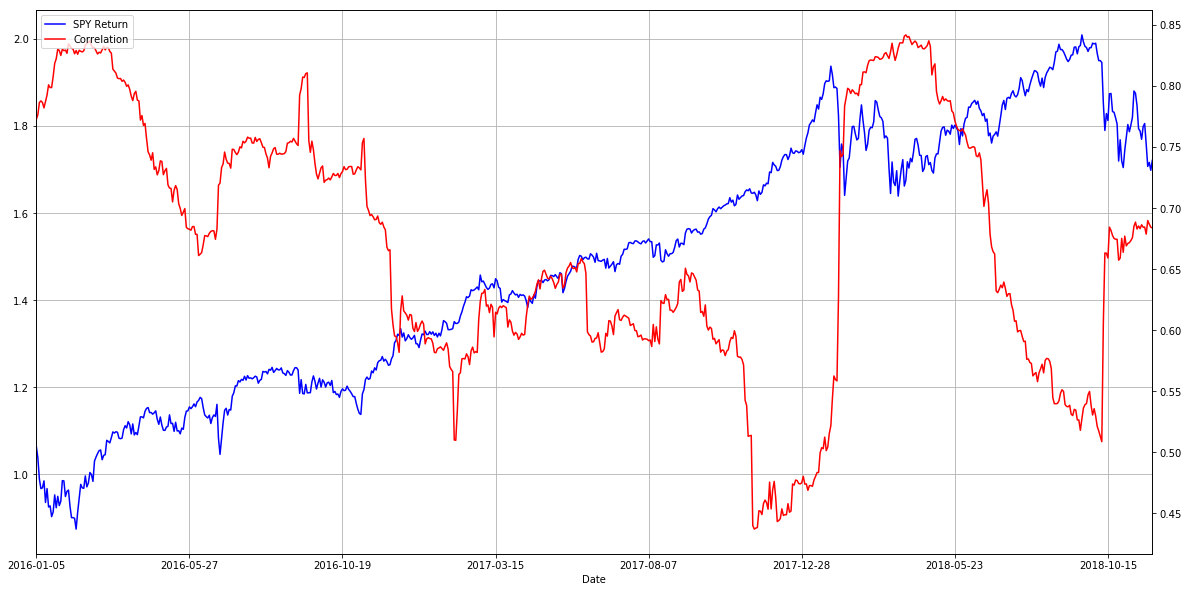

                XLRE       XLV       XLI       XLK       XLP       XLU  \
2018-11-19  0.375549  0.916751  0.875858  0.926255  0.432850  0.033189   
2018-11-20  0.401001  0.915507  0.880393  0.926242  0.465930  0.055807   
2018-11-21  0.401249  0.908165  0.880749  0.926445  0.456234  0.043590   
2018-11-23  0.405343  0.903898  0.880365  0.926059  0.452394  0.035683   
2018-11-26  0.399084  0.903288  0.876807  0.926613  0.444495  0.035809   

                 XLB       XLY       XLF       XLE  Avg_Corr   SPY_cum  
2018-11-19  0.784050  0.904896  0.799424  0.737701  0.678652  1.758232  
2018-11-20  0.789038  0.908603  0.806617  0.748874  0.689801  1.707188  
2018-11-21  0.790515  0.907478  0.806531  0.747581  0.686854  1.716413  
2018-11-23  0.789629  0.906843  0.809342  0.733773  0.684333  1.698270  
2018-11-26  0.793197  0.908157  0.811755  0.738282  0.683749  1.721025  


In [52]:
rolling_window = 60
plot_window = 10000

corr_df, sector_df = check_mkt_corr(rolling_window, plot_window)
print(corr_df.tail())

In [53]:
((sector_df.dropna() + 1).cumprod()-1).tail()

,SPY,XLRE,XLV,XLI,XLK,XLP,XLU,XLB,XLC,XLY,XLF,XLE
2018-11-19,-0.023230,0.065079,0.070823,-0.032500,-0.081478,0.096161,0.098227,-0.069072,-0.128903,-0.071659,-0.020841,-0.101418
2018-11-20,-0.041307,0.051111,0.060806,-0.052574,-0.101218,0.077948,0.093644,-0.085998,-0.140312,-0.092682,-0.042413,-0.130854
2018-11-21,-0.038040,0.050476,0.054796,-0.045883,-0.094638,0.069330,0.077505,-0.078646,-0.130104,-0.083199,-0.041682,-0.117206
2018-11-23,-0.044465,0.046667,0.056328,-0.047795,-0.102898,0.073051,0.078103,-0.088562,-0.141513,-0.087314,-0.049360,-0.144902
2018-11-26,-0.036407,0.044762,0.061160,-0.047180,-0.094988,0.071289,0.078502,-0.082749,-0.129704,-0.075684,-0.033437,-0.134868


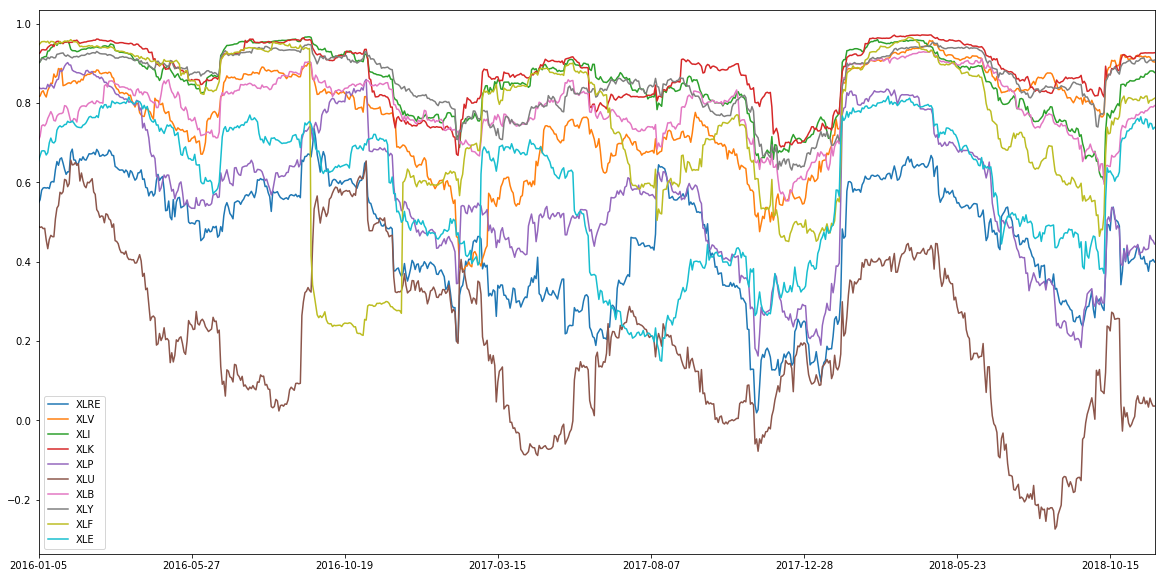

In [54]:
corr_df.iloc[:,:-2].plot(figsize = (20,10))

## Earnings

In [ ]:
date_lookup = '2018-11-21'

curr_earnings = date_earnings(date_lookup)
curr_earnings = curr_earnings[curr_earnings['Call Time'].isin(['After Market Close', 'Before Market Open'])]
curr_earnings['EarningsDate'] = date_lookup


In [77]:
month = 11
year = 2018
days_list = list(range(29, 31))

week_earnings = []

for i in days_list:
    date_lookup = '{0}-{1}-{2}'.format(year,month,i)
    curr_earnings = date_earnings(date_lookup)
    curr_earnings = curr_earnings[curr_earnings['Call Time'].isin(['After Market Close', 'Before Market Open'])]
    curr_earnings['EarningsDate'] = date_lookup
    week_earnings.append(curr_earnings)
    
curr_earnings = pd.concat(week_earnings,axis = 0)

focus_names = []
max_spread = 1

for ticker in curr_earnings.index:
    try:
        curr_options = all_options(ticker, 100, 1)
    except:
        curr_options = []
    
    if len(curr_options) == 0:
        continue
    elif (curr_options['Ask'] - curr_options['Bid']).mean() <= max_spread:
        focus_names.append(ticker)
    else:
        continue
        
curr_earnings = curr_earnings[curr_earnings.index.isin(focus_names)]

In [78]:
acs = curr_earnings[curr_earnings['Call Time'] == 'After Market Close']
bcs = curr_earnings[curr_earnings['Call Time'] == 'Before Market Open']
curr_earnings

,Call Time,EPS Estimate,Name,EarningsDate
ANF,Before Market Open,0.2,Abercrombie &amp; Fitch Co,2018-11-29
PANW,After Market Close,1.05,Palo Alto Networks Inc,2018-11-29
BBW,Before Market Open,-0.12,Build-A-Bear Workshop Inc,2018-11-29
AMBA,After Market Close,0.09,Ambarella Inc,2018-11-29
AVAV,After Market Close,0.16,AeroVironment Inc,2018-11-29
BIG,Before Market Open,-,Big Lots Inc,2018-11-29
PDCO,Before Market Open,0.37,Patterson Companies Inc,2018-11-29
PVH,After Market Close,3.14,PVH Corp,2018-11-29
GME,After Market Close,0.57,GameStop Corp,2018-11-29
TECD,Before Market Open,2.17,Tech Data Corp,2018-11-29


In [79]:
acs 

,Call Time,EPS Estimate,Name,EarningsDate
PANW,After Market Close,1.05,Palo Alto Networks Inc,2018-11-29
AMBA,After Market Close,0.09,Ambarella Inc,2018-11-29
AVAV,After Market Close,0.16,AeroVironment Inc,2018-11-29
PVH,After Market Close,3.14,PVH Corp,2018-11-29
GME,After Market Close,0.57,GameStop Corp,2018-11-29
HPQ,After Market Close,0.54,HP Inc,2018-11-29
SPLK,After Market Close,0.32,Splunk Inc,2018-11-29
ZUO,After Market Close,-0.13,Zuora Inc,2018-11-29
WDAY,After Market Close,0.14,Workday Inc,2018-11-29


In [80]:
bcs

,Call Time,EPS Estimate,Name,EarningsDate
ANF,Before Market Open,0.2,Abercrombie &amp; Fitch Co,2018-11-29
BBW,Before Market Open,-0.12,Build-A-Bear Workshop Inc,2018-11-29
BIG,Before Market Open,-,Big Lots Inc,2018-11-29
PDCO,Before Market Open,0.37,Patterson Companies Inc,2018-11-29
TECD,Before Market Open,2.17,Tech Data Corp,2018-11-29
DLTR,Before Market Open,1.14,Dollar Tree Inc,2018-11-29
EXPR,Before Market Open,0.11,Express Inc,2018-11-29
KIRK,Before Market Open,-0.15,Kirkland's Inc,2018-11-29
PLCE,Before Market Open,3.07,Childrens Place Inc,2018-11-30
DXLG,Before Market Open,-0.08,Destination XL Group Inc,2018-11-30


In [81]:
start_time = time.time()

start_date = dt.datetime(2018,1,1)

earnings_data = lookup_earnings(focus_names, start_date)

print("--- %s seconds ---" % (time.time() - start_time))

No revenues for ANF
5.26% Completed
10.53% Completed
No revenues for BBW
15.79% Completed
21.05% Completed
26.32% Completed
No revenues for BIG
31.58% Completed
36.84% Completed
No revenues for PVH
42.11% Completed
No revenues for GME
47.37% Completed
52.63% Completed
57.89% Completed
No revenues for HPQ
63.16% Completed
68.42% Completed
73.68% Completed
78.95% Completed
84.21% Completed
89.47% Completed
--- 154.96961522102356 seconds ---


In [82]:
#################### Preliminary Name Selection ###################################
summary_df = earnings_data[1]
summary_df = summary_df[summary_df['Market Cap(Mil.)'] > 500].sort_values('Market Cap(Mil.)')

eps_df = earnings_data[0]
eps_df = eps_df[eps_df.Underlying.isin(summary_df.index)]
eps_df['NegativeSurprise'] = eps_df['surprisePercent'] < 0 
eps_df['PositiveSurprise'] = eps_df['surprisePercent'] > 0
eps_df['returnDifferentFromEPS'] = eps_df['surprisePercent']*eps_df['Stock_closeToOpen'] < 0
eps_df['LargeMoves'] = abs(eps_df['Stock_closeToOpen']) > 0.02

eps_corr = eps_df[['Underlying','NegativeSurprise',
                   'PositiveSurprise',
                   'returnDifferentFromEPS']].groupby('Underlying').sum()
eps_corr['surpriseReturnCorrelation'] = np.nan
corrs = []
for ticker in eps_corr.index:
    curr_corr = eps_df[eps_df['Underlying'] == ticker]
    corrs.append(curr_corr[['surprisePercent','Stock_closeToOpen']].corr().iloc[0,1])
eps_corr['surpriseReturnCorrelation'] = corrs
eps_corr['LargeMoves'] = eps_df[['Underlying','LargeMoves']].groupby('Underlying').sum()

selected_names = eps_corr[eps_corr['LargeMoves'] > 2].index.tolist()

#################### Filtering on Preliminary Name Selection ###################################
summary_df = summary_df[summary_df.index.isin(selected_names)]

eps_df = eps_df[eps_df.Underlying.isin(summary_df.index)]
eps_corr = eps_corr[eps_corr.index.isin(summary_df.index)]

scores_df = earnings_data[2]
scores_df = scores_df[scores_df.index.isin(summary_df.index)]
scores_df['TotalScore'] = scores_df.mean(axis = 1)
scores_df = scores_df.sort_values('TotalScore')

analyst_df = earnings_data[3]
analyst_df = analyst_df[analyst_df.index.isin(summary_df.index)]

valuations_df = earnings_data[4]
valuations_df = valuations_df[valuations_df.Underlying.isin(summary_df.index)]

growthrate_df = earnings_data[5]
growthrate_df = growthrate_df[growthrate_df.Underlying.isin(summary_df.index)]

profitability_df = earnings_data[6]
profitability_df = profitability_df[profitability_df.Underlying.isin(summary_df.index)]

finstrength_df = earnings_data[7]
finstrength_df = finstrength_df[finstrength_df.Underlying.isin(summary_df.index)]

perf_df = earnings_data[8]
perf_df = perf_df[perf_df.Underlying.isin(summary_df.index)]

rev_revisions_df = earnings_data[9]
rev_revisions_df = rev_revisions_df[rev_revisions_df.Underlying.isin(summary_df.index)]

earnings_revisions_df = earnings_data[10]
earnings_revisions_df = earnings_revisions_df[earnings_revisions_df.Underlying.isin(summary_df.index)]

insider_trades = earnings_data[11]
insider_trades = insider_trades[insider_trades.Underlying.isin(summary_df.index)]
insider_trades['Trading Date'] = pd.to_datetime(insider_trades['Trading Date'])
def aggregate_txns_date(trade_date):
    
    trade_month = trade_date.month
    trade_year = trade_date.year
    if trade_month <= 3:
        return dt.datetime(trade_year,3,31).date()
    elif trade_month <= 6:
        return dt.datetime(trade_year,6,30).date()
    elif trade_month <= 9:
        return dt.datetime(trade_year,9,30).date()
    else:
        return dt.datetime(trade_year,12,31).date()
    
insider_trades['Trading Date'] = insider_trades['Trading Date'].apply(aggregate_txns_date)

growth_sums = earnings_data[12]
growth_sums = growth_sums[growth_sums.Underlying.isin(summary_df.index)]


In [83]:
selected_names = scores_df.sort_values(['ValuationScore','TotalScore']).index.tolist()

options_dict = {}

for name in selected_names:
    
    try:
        curr_options = all_options(name,100,1,moneyness=0.1)
        if len(curr_options) > 0 and (curr_options['Ask'] - curr_options['Bid']).mean() < 1:
            options_dict[name] = curr_options
    except:
        None
        
selected_names = list(options_dict.keys())

In [84]:
vols_list = []

for selected_name in selected_names:
    curr_vol = historical_data(selected_name, dt.datetime(2018,1,1))[['daily_ann','intra_ann','ovrnt_ann']].tail(1)
    curr_vol.index = [selected_name]
    
    aq = alphaquery(selected_name)
    
    curr_iv = aq.vol_df.loc[['Implied Volatility (Calls)', 'Implied Volatility (Puts)', 
                             'Put-Call Implied Volatility Ratio',
                             'Implied Volatility Skew'],['20-Day']].T
    curr_iv.index = [selected_name]
    vols_list.append(curr_vol.join(curr_iv))
    
hv_df = pd.concat(vols_list,axis = 0)

In [85]:
insider_agg_lst = []


for selected_name in selected_names:
    curr_insider_agg = insider_trades[insider_trades.Underlying == selected_name].groupby(['Type']).agg({'Shares Traded': 'sum'}).T
    curr_insider_agg.index = [selected_name]
    insider_agg_lst.append(curr_insider_agg)
    
insider_agg = pd.concat(insider_agg_lst,axis = 0)
insider_agg['BuyToSell'] = insider_agg['Buy']/insider_agg['Sell']


further_reduce = hv_df[(hv_df['intra_ann'] > hv_df['Implied Volatility (Calls)']) &
                       (hv_df['intra_ann'] > hv_df['Implied Volatility (Puts)'])].dropna().sort_values('intra_ann').join(insider_agg,
                                                                                                        how = 'inner')
selected_names = further_reduce.index.tolist()
curr_shares_out = summary_df[summary_df.index.isin(selected_names)][['Shares Outstanding(Mil.)']]*1000000
further_reduce.join(curr_earnings[['Call Time','EarningsDate']], how = 'left').sort_values(['EarningsDate','Call Time'],ascending = True)#.join(summary_df[summary_df.columns.tolist()[5:]], how = 'inner')


,daily_ann,intra_ann,ovrnt_ann,Implied Volatility (Calls),Implied Volatility (Puts),Put-Call Implied Volatility Ratio,Implied Volatility Skew,Buy,Gift,Sell,BuyToSell,Call Time,EarningsDate
HPQ,0.307012,0.487707,0.162264,0.3767,0.4332,1.1500,0.0491,9958416.0,NaN,8186280.0,1.216476,After Market Close,2018-11-29
PANW,0.338518,0.537932,0.187081,0.5111,0.5062,0.9904,0.0888,1553120.0,34000.0,1829948.0,0.848724,After Market Close,2018-11-29
AVAV,0.484591,0.884004,0.196041,0.7215,0.7112,0.9857,0.1061,178108.0,NaN,144312.0,1.234187,After Market Close,2018-11-29
AMBA,0.436394,0.884146,0.268190,0.8097,0.8118,1.0026,0.0306,306342.0,NaN,310404.0,0.986914,After Market Close,2018-11-29
SPLK,0.703329,1.095805,0.380942,0.7156,0.7109,0.9934,0.0730,NaN,NaN,1351070.0,NaN,After Market Close,2018-11-29
GME,0.685583,1.149000,0.248243,0.5840,0.8446,1.4462,-0.0566,1229752.0,1138.0,390282.0,3.150932,After Market Close,2018-11-29
TECD,0.359050,0.619540,0.135105,0.5252,0.5138,0.9783,0.0804,159288.0,5520.0,63328.0,2.515285,Before Market Open,2018-11-29
PDCO,0.372313,0.692127,0.107568,0.4830,0.4870,1.0083,0.0318,840804.0,NaN,9024.0,93.174202,Before Market Open,2018-11-29
BIG,0.467367,0.788248,0.210569,0.5053,0.5727,1.1334,-0.0055,776963.0,6674.0,747750.0,1.039068,Before Market Open,2018-11-29
PLCE,0.530534,0.800946,0.423058,0.5015,0.5266,1.0500,0.0413,139175.0,NaN,1560905.0,0.089163,Before Market Open,2018-11-30


In [88]:
shorts = ['HPQ', 'PANW','AMBA','SPLK','GME','PLCE'] #further_reduce.index.tolist()

longs = []

print(scores_df[scores_df.index.isin(shorts + longs)])
print(eps_df[eps_df.Underlying.isin(shorts + longs)][['EarningsDate',
                                                      'surprisePercent',
                                                      'Underlying',
                                                      'Quarter',
                                                      'Stock_closeToOpen']].set_index('Underlying'))
print(analyst_df[analyst_df.index.isin(shorts + longs)].sort_values('Current'))


summary_df[summary_df.index.isin(shorts + longs)].T


      FinStrengthScore  GrowthRateScore  PerfRankScore  ProfitScore  \
PANW               0.0            71.43          71.82         20.0   
AMBA              80.0            28.57          49.19         50.0   
HPQ               10.0            14.29          76.97         25.0   
SPLK              40.0            57.14          90.00         20.0   
GME               50.0            14.29          69.19         35.0   
PLCE              50.0            28.57          68.18         25.0   

      ReturnScore  ValuationScore  TotalScore  
PANW         40.0            6.25   34.916667  
AMBA          0.0           18.75   37.751667  
HPQ         100.0           56.25   47.085000  
SPLK         70.0           12.50   48.273333  
GME          60.0           62.50   48.496667  
PLCE         80.0           75.00   54.458333  
           EarningsDate  surprisePercent    Quarter  Stock_closeToOpen
Underlying                                                            
PANW         2017-08-31 

,AMBA,GME,PLCE,SPLK,PANW,HPQ
Beta,1.05,1.28,0.25,2.13,1.19,1.84
Dividend,NaN,0.38,0.50,NaN,NaN,0.13
EPS (TTM) Industry,NaN,NaN,NaN,NaN,NaN,NaN
EPS (TTM) Sector,NaN,NaN,NaN,NaN,NaN,NaN
EPS (TTM) Stock,-0.06,3.32,7.08,-2.08,-1.62,1.39
High52Week,66.23,20.31,161.65,130.00,239.50,27.08
LastPrice,34.44,15.05,131.74,99.14,173.52,23.22
Low52Week,30.00,12.14,112.55,76.89,140.12,19.31
Market Cap(Mil.),1068.77,2028.17,2142.87,13557.02,15711.89,34373.84
P/E (TTM) Industry,7.69,36.19,30.76,39.50,25.67,16.50


In [89]:
# Writing to Excel
os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Data\\Historical Queries\\Earnings')
datenow = dt.datetime.today().strftime('%Y-%m-%d')
writer = pd.ExcelWriter('earnings-{}.xlsx'.format(datenow), engine='xlsxwriter')

# Write each dataframe to a different worksheet.
further_reduce.join(summary_df[summary_df.columns.tolist()[5:]], 
                    how = 'inner').join(curr_earnings).to_excel(writer, sheet_name='Summary')

eps_df[eps_df.Underlying.isin(shorts + longs)][['EarningsDate',
                                                      'surprisePercent',
                                                      'Underlying',
                                                      'Quarter',
                                                      'Stock_closeToOpen']].set_index('Underlying').to_excel(writer, sheet_name='EarningsHist')



selected_names = shorts + longs#

for selected_name in selected_names:
    print(selected_name)
    for i, df in enumerate(earnings_data):
        
        try:
            if i == 2 or i == 3 or i == 1:
                None #print(df[df.index == selected_name])
            elif i == 11:
                #print(df[df.Underlying == selected_name][df.columns.tolist()[1:-1]])
                insider_trades[insider_trades.Underlying == selected_name].groupby(['Trading Date','Title',
                                                                                          'Type']).agg({'Underlying':'count',
                                                                                                        'Shares Traded': 'sum'}).to_excel(writer, sheet_name='{} Txns'.format(selected_name))
                print(insider_trades[insider_trades.Underlying == selected_name].groupby(['Trading Date','Title',
                                                                                          'Type']).agg({'Underlying':'count',
                                                                                                        'Shares Traded': 'sum'}))
            else:
                print(df[df.Underlying == selected_name])
            print('\n')
        except:
            continue
        
# Close the Pandas Excel writer and output the Excel file.
writer.save()
os.chdir(main_dir)

HPQ
  epsActual epsDifference epsEstimate  surprisePercent Underlying    Quarter  \
0      0.44             0        0.44            0.000        HPQ 2017-10-31   
1      0.48          0.06        0.42            0.143        HPQ 2018-01-31   
2      0.48             0        0.48            0.000        HPQ 2018-04-30   
3      0.52          0.01        0.51            0.020        HPQ 2018-07-31   

   Stock_closeToOpen EarningsDate  
0          -0.065004   2017-11-21  
1           0.063581   2018-02-22  
2           0.051643   2018-05-29  
3          -0.025579   2018-08-23  








   Company                         Field  industry   sector Underlying
0    14.82               P/E Ratio (TTM)     16.50  1223.71        HPQ
1    10.65        P/E High - Last 5 Yrs.     25.68    23.16        HPQ
2     4.22         P/E Low - Last 5 Yrs.     12.35     9.16        HPQ
3     1.84                          Beta      0.89     1.30        HPQ
4     0.68          Price to Sales (TTM)      0.84  

  epsActual epsDifference epsEstimate  surprisePercent Underlying    Quarter  \
0      0.17          0.03        0.14            0.214       SPLK 2017-10-31   
1      0.37          0.04        0.33            0.121       SPLK 2018-01-31   
2     -0.07          0.02       -0.09            0.222       SPLK 2018-04-30   
3      0.08          0.03        0.05            0.600       SPLK 2018-07-31   

   Stock_closeToOpen EarningsDate  
0           0.140548   2017-11-16  
1           0.046668   2018-03-01  
2          -0.005245   2018-05-24  
3           0.066555   2018-08-23  








   Company                         Field  industry   sector Underlying
0      NaN               P/E Ratio (TTM)     34.44  1223.71       SPLK
1      NaN        P/E High - Last 5 Yrs.     59.98    23.16       SPLK
2      NaN         P/E Low - Last 5 Yrs.     18.79     9.16       SPLK
3     2.01                          Beta      0.69     1.30       SPLK
4     8.72          Price to Sales (TTM)      5.54     2

In [90]:
writer.save()

In [ ]:
# BKE CRM RAVN

In [75]:
selected_name = 'SMTC'

aq = alphaquery(selected_name)
print(aq.vol_df)


select_trades = insider_trades[insider_trades.Underlying == selected_name].groupby(['Trading Date','Title',
                                                                                    'Type']).agg({'Underlying':'count',
                                                                                                  'Shares Traded': 'sum'}).reset_index()
select_trades['Percent of Float'] = 100*select_trades['Shares Traded']/curr_shares_out.loc[selected_name,'Shares Outstanding(Mil.)']
select_trades.groupby(['Trading Date','Title',
                       'Type']).agg({'Underlying':'count',
                                     'Shares Traded': 'sum',
                                     'Percent of Float': 'sum'})


                                         10-Day   20-Day   30-Day   60-Day  \
Field                                                                        
Historical Volatility (Close-to-Close)   0.5599   0.5233   0.4807   0.4817   
Historical Volatility (Parkinson)        0.4446   0.4070   0.4267   0.4147   
Implied Volatility (Calls)               0.5506   0.5506   0.5270   0.4523   
Implied Volatility (Puts)                0.5459   0.5459   0.5233   0.4511   
Implied Volatility (Mean)                0.5482   0.5482   0.5252   0.4517   
Put-Call Implied Volatility Ratio        0.9915   0.9915   0.9930   0.9973   
Implied Volatility Skew                  0.0610   0.0610   0.0597   0.0518   
Put-Call Ratio (Volume)                  1.3830   1.3830   1.2889   0.8414   
Put-Call Ratio (Open Interest)           0.6803   0.6803   0.5466   0.1373   
Forward Price                           46.2000  46.2000  46.2200  46.3500   
Call Breakeven Price                    51.5400  51.5400  51.200

Underlying  Shares Traded  \
Trading Date Title                   Type                              
2018-09-30   Chief Financial Officer Sell           1        22000.0   
             Director                Sell           1        33560.0   
             Officer                 Buy            1       601760.0   
                                     Sell           1       803020.0   
2018-12-31   Officer                 Buy            1        37500.0   
                                     Sell           1        59140.0   

                                           Percent of Float  
Trading Date Title                   Type                    
2018-09-30   Chief Financial Officer Sell          0.033233  
             Director                Sell          0.050695  
             Officer                 Buy           0.909003  
                                     Sell          1.213021  
2018-12-31   Officer                 Buy           0.056647  
                                     Sell          0.089335

In [ ]:
# Saving Selected Names for Reference

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Data\\Historical Queries\\Earnings')

datenow = dt.datetime.today().strftime('%Y-%m-%d')

scores_df[scores_df.index.isin(longs + shorts)].sort_values(['ValuationScore',
                       'TotalScore']).join(summary_df.join(curr_earnings)).to_csv('earnings-{}.csv'.format(datenow))

os.chdir(main_dir)

## Barbell Hedging

In [ ]:
ratios = spx_put_backratios(50, 1, 0.2, 2, 25)

In [ ]:
ratios

In [ ]:
spx_options = all_greeks(all_options('^SPX',50,1,0.2))
spx_options = spx_options[(spx_options['Type'] == 'put') &
                          (spx_options['Strike'] < spx_options['Underlying_Price'])]

In [ ]:
spx_options[(spx_options['DTE'] == 7) &
            (spx_options['Strike'] == 2390.0)]